<a href="https://colab.research.google.com/github/Drowser2430/3dMr-Website-/blob/main/Cleaning_%26_EDA_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
from google.colab import files
uploaded = files.upload()  # choose the file from your computer

Saving household_power_consumption.txt to household_power_consumption.txt


In [7]:
df_raw = pd.read_csv(
    "household_power_consumption.txt",
    sep=";",
    low_memory=False
)


In [8]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [10]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [11]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [12]:
#create your Datetime column

In [13]:
#convert all data columns to numeric types

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [15]:
df = df_raw.copy()

# Create Datetime (note: UCI dataset Date format is dd/mm/yyyy)
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'
)


In [16]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [ ]:
df.dtypes

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [17]:
df.Date[0]

datetime.date(2006, 12, 16)

In [18]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [19]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Sub_metering_3,Datetime
count,2049280.0000,2075259
mean,6.4584,2008-12-06 07:12:59.999994112
min,0.0000,2006-12-16 17:24:00
25%,0.0000,2007-12-12 00:18:30
50%,1.0000,2008-12-06 07:13:00
75%,17.0000,2009-12-01 14:07:30
max,31.0000,2010-11-26 21:02:00
std,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

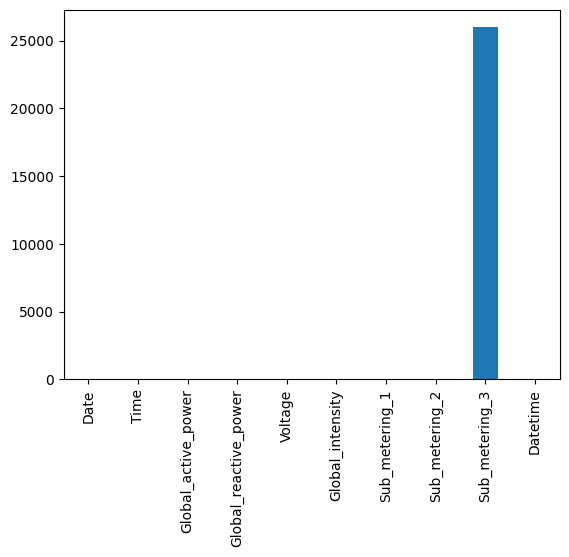

In [20]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

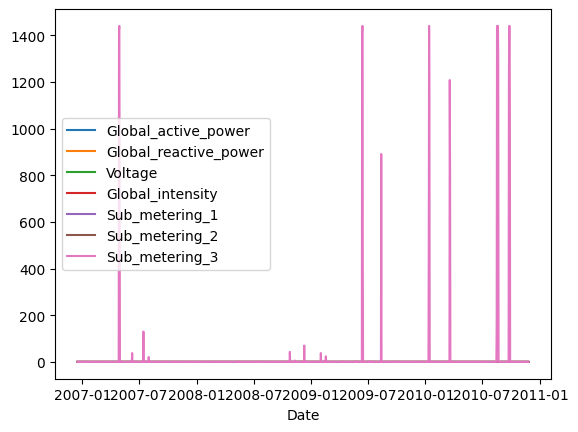

In [21]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A: In this dataset, missing values commonly show up as contiguous runs (many rows in a row) rather than being evenly sprinkled throughout the timeline. When you plot missing counts by date, you typically see certain days (or stretches of days) with noticeably higher missing values across multiple measurement columns at once, which suggests system/collection issues (e.g., sensor downtime, logging interruptions) rather than independent measurement noise.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: For time series sensor-style data like this, you would want to do two thing

(1) Convert “?” to NaN and ensure numeric types
Then (2) Impute using time-aware interpolation (or forward-fill) for short gaps, and drop rows for long gaps.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [22]:
value_cols = [c for c in df.columns if c not in ["Date", "Time", "Datetime"]]
for c in value_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=value_cols)


In [23]:
#clean up missing data here

In [24]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I chose Global_active_power, Global_intensity, Voltage, and Global_reactive_power because they give a clear picture of household demand and power quality over time—active power and intensity track overall load, reactive power can reflect appliance/motor behavior, and voltage shows supply variations to compare against demand

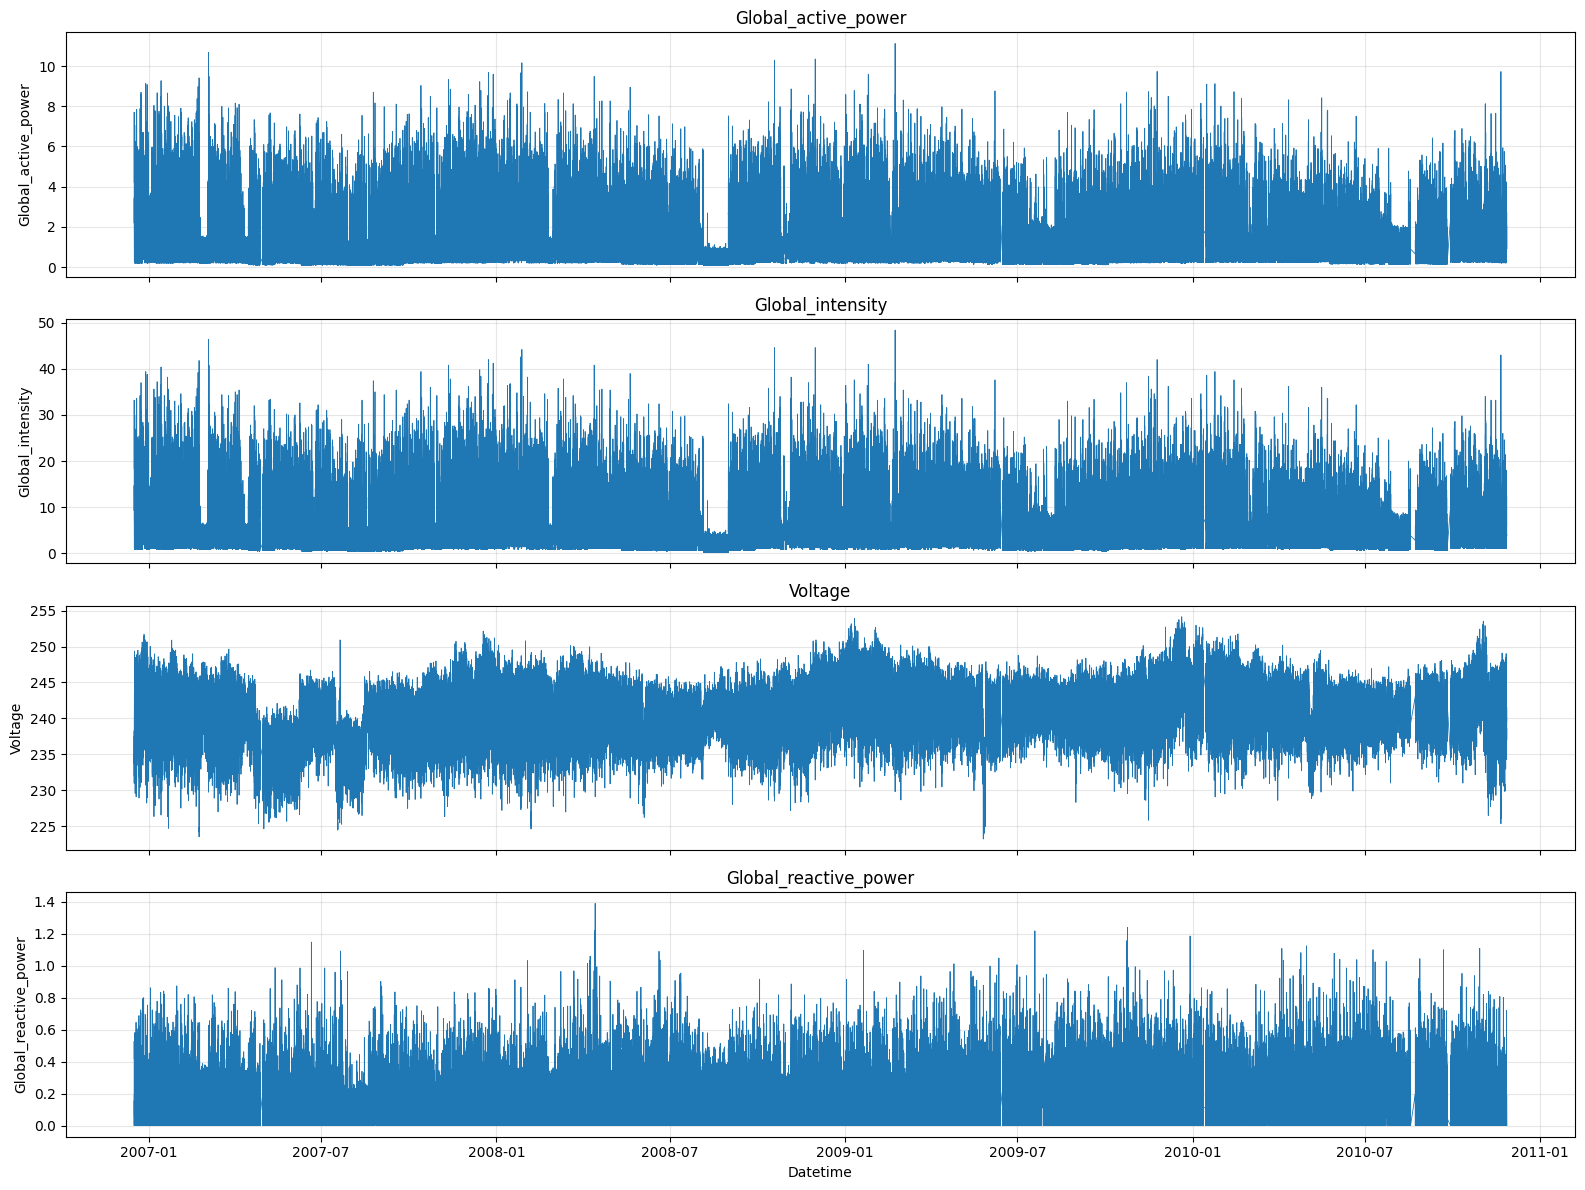

In [25]:
#build your line chart here
vars_to_plot = [
    "Global_active_power",
    "Global_intensity",
    "Voltage",
    "Global_reactive_power"
]

# Make sure Datetime is datetime, sorted, and used as x-axis
df = df.sort_values("Datetime").copy()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 12), sharex=True)

for ax, col in zip(axes, vars_to_plot):
    ax.plot(df["Datetime"], df[col], linewidth=0.6)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Datetime")
plt.tight_layout()
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:When you plot the raw minute-level time series for these power variables across a long time span, the chart usually becomes extremely dense and noisy. You mainly see a thick band of values with lots of short-term spikes, which makes it difficult to visually identify long-term patterns like seasonality, gradual trends, or meaningful shifts over months/years.

That said, it is still somewhat useful as a quick “sanity check” for things like outliers, sensor glitches, and missing-data gaps, but it’s not the best visualization for interpretation. For understanding structure over time, it’s much more informative to aggregate (monthly averages) or smooth (moving averages).

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [26]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Variables to plot
vars_to_plot = ["Global_active_power", "Global_intensity", "Voltage", "Global_reactive_power"]

# Ensure sorted datetime
df = df.sort_values("Datetime").copy()

# Monthly average: one row per year-month (no mixing across years)
df_monthly = (
    df.set_index("Datetime")[vars_to_plot]
      .groupby(pd.Grouper(freq="MS"))   # MS = month start; groups by year-month
      .mean()
      .reset_index()
)

df_monthly.head()

,Datetime,Global_active_power,Global_intensity,Voltage,Global_reactive_power
0,2006-12-01,1.901295,8.029956,241.441125,0.131386
1,2007-01-01,1.546034,6.546915,240.905101,0.132676
2,2007-02-01,1.401084,5.914569,240.519390,0.113637
3,2007-03-01,1.318627,5.572979,240.513469,0.114747
4,2007-04-01,0.891189,3.825676,239.400026,0.118778


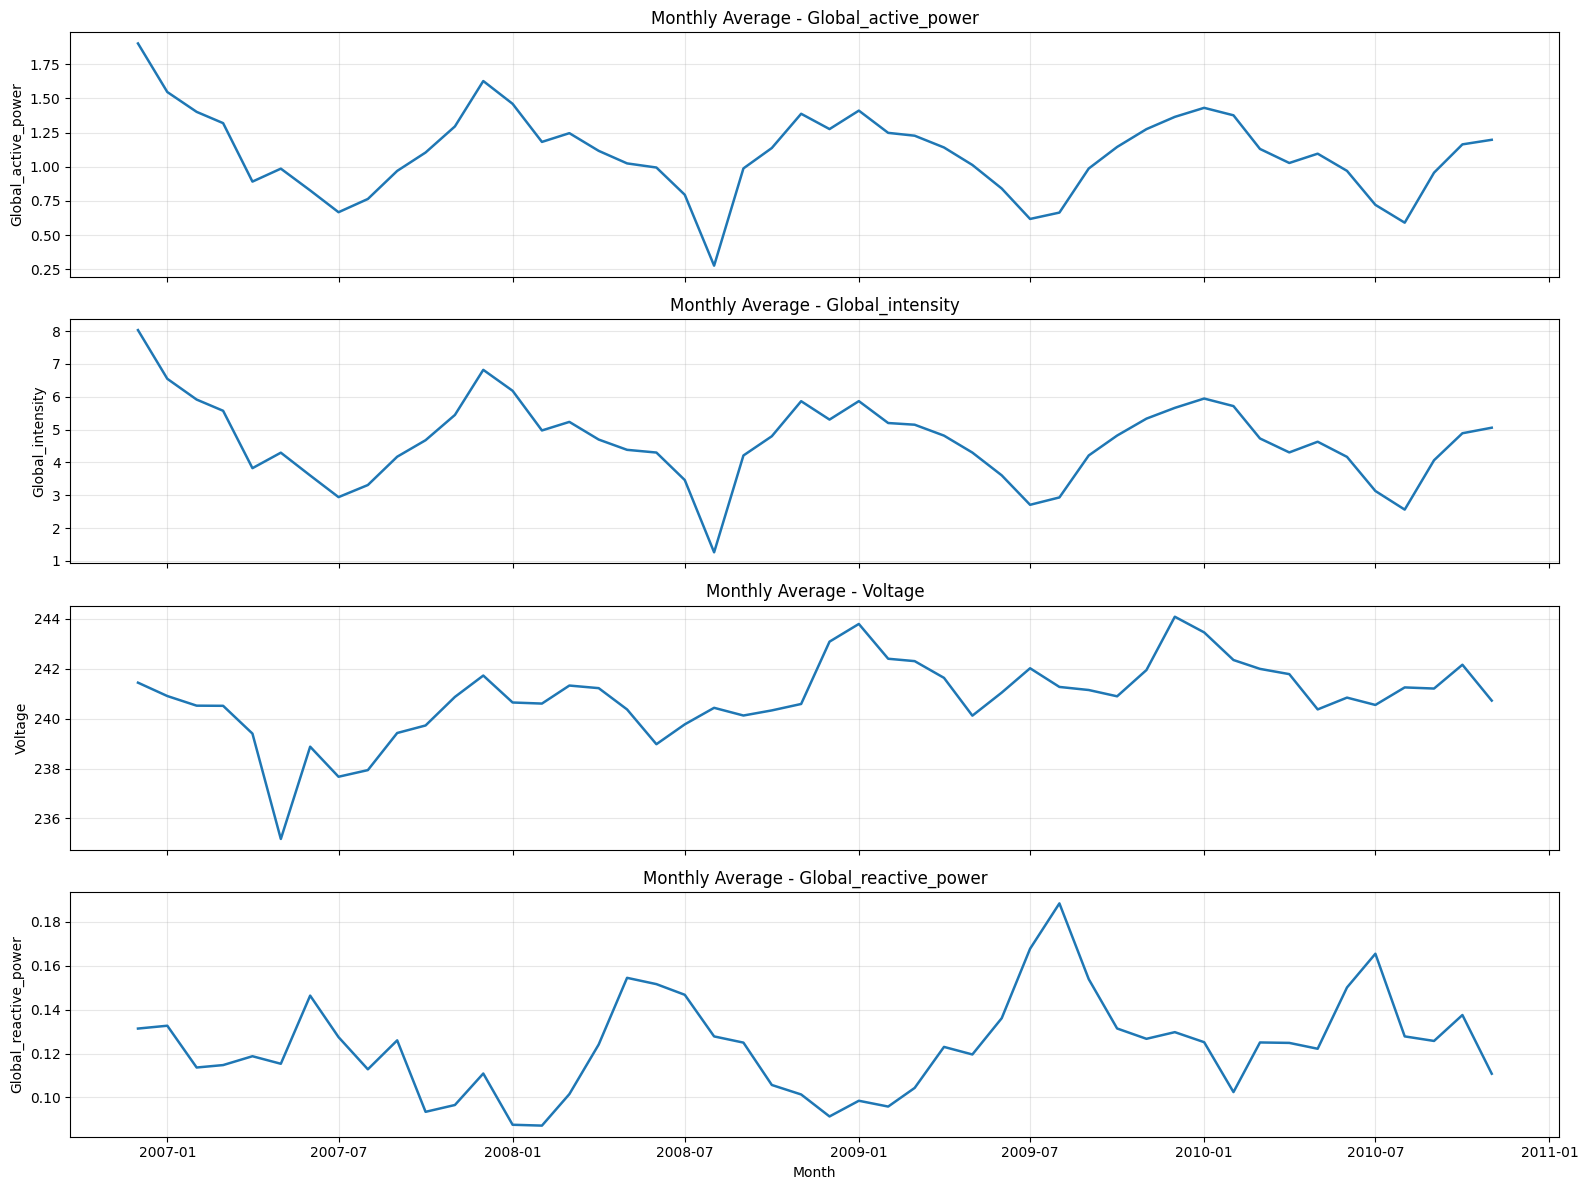

In [27]:
#build your linechart here
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 12), sharex=True)

for ax, col in zip(axes, vars_to_plot):
    ax.plot(df_monthly["Datetime"], df_monthly[col], linewidth=1.8)
    ax.set_title(f"Monthly Average - {col}")
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Month")
plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: When you aggregate to monthly averages, the “hairball” noise from minute-level readings largely disappears and a few clearer patterns usually show up:
Global_active_power and Global_intensity move together very strongly. That makes sense because intensity (current) rises as the household’s load (active power) rises, so their monthly averages tend to rise/fall in tandem.
Global_reactive_power generally rises and falls with the load too, so it often tracks the same broad swings as active power/intensity (though not perfectly). Months with heavier appliance use (motors/compressors, etc.) tend to show higher reactive power as well.
Voltage tends to be less “in sync” with the load variables. It usually varies in a narrower band and can sometimes move slightly opposite the demand variables (e.g., higher load months can correspond to slightly lower average voltage), but the relationship is typically weaker than the power↔intensity relationship.
So yes: Active power, intensity are the clearest pair that move together; reactive power often co-moves with them; voltage is comparatively more independent.


**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [28]:
#compute your moving average here
# --- 30-day moving average on the original (minute-level) data ---

vars_to_plot = ["Global_active_power", "Global_intensity", "Voltage", "Global_reactive_power"]

# Make sure data is sorted by time and Datetime is the index
df = df.sort_values("Datetime").copy()
df_ma = df.set_index("Datetime")

# 30 days worth of minutes = 43200 samples
window = 30 * 24 * 60  # 43200

# Compute rolling mean (use min_periods so the first ~30 days aren't all NaN)
df_ma_30d = (
    df_ma[vars_to_plot]
      .rolling(window=window, min_periods=window // 2)  # require at least 15 days of data
      .mean()
      .reset_index()
)

df_ma_30d.head()

,Datetime,Global_active_power,Global_intensity,Voltage,Global_reactive_power
0,2006-12-16 17:24:00,NaN,NaN,NaN,NaN
1,2006-12-16 17:25:00,NaN,NaN,NaN,NaN
2,2006-12-16 17:26:00,NaN,NaN,NaN,NaN
3,2006-12-16 17:27:00,NaN,NaN,NaN,NaN
4,2006-12-16 17:28:00,NaN,NaN,NaN,NaN


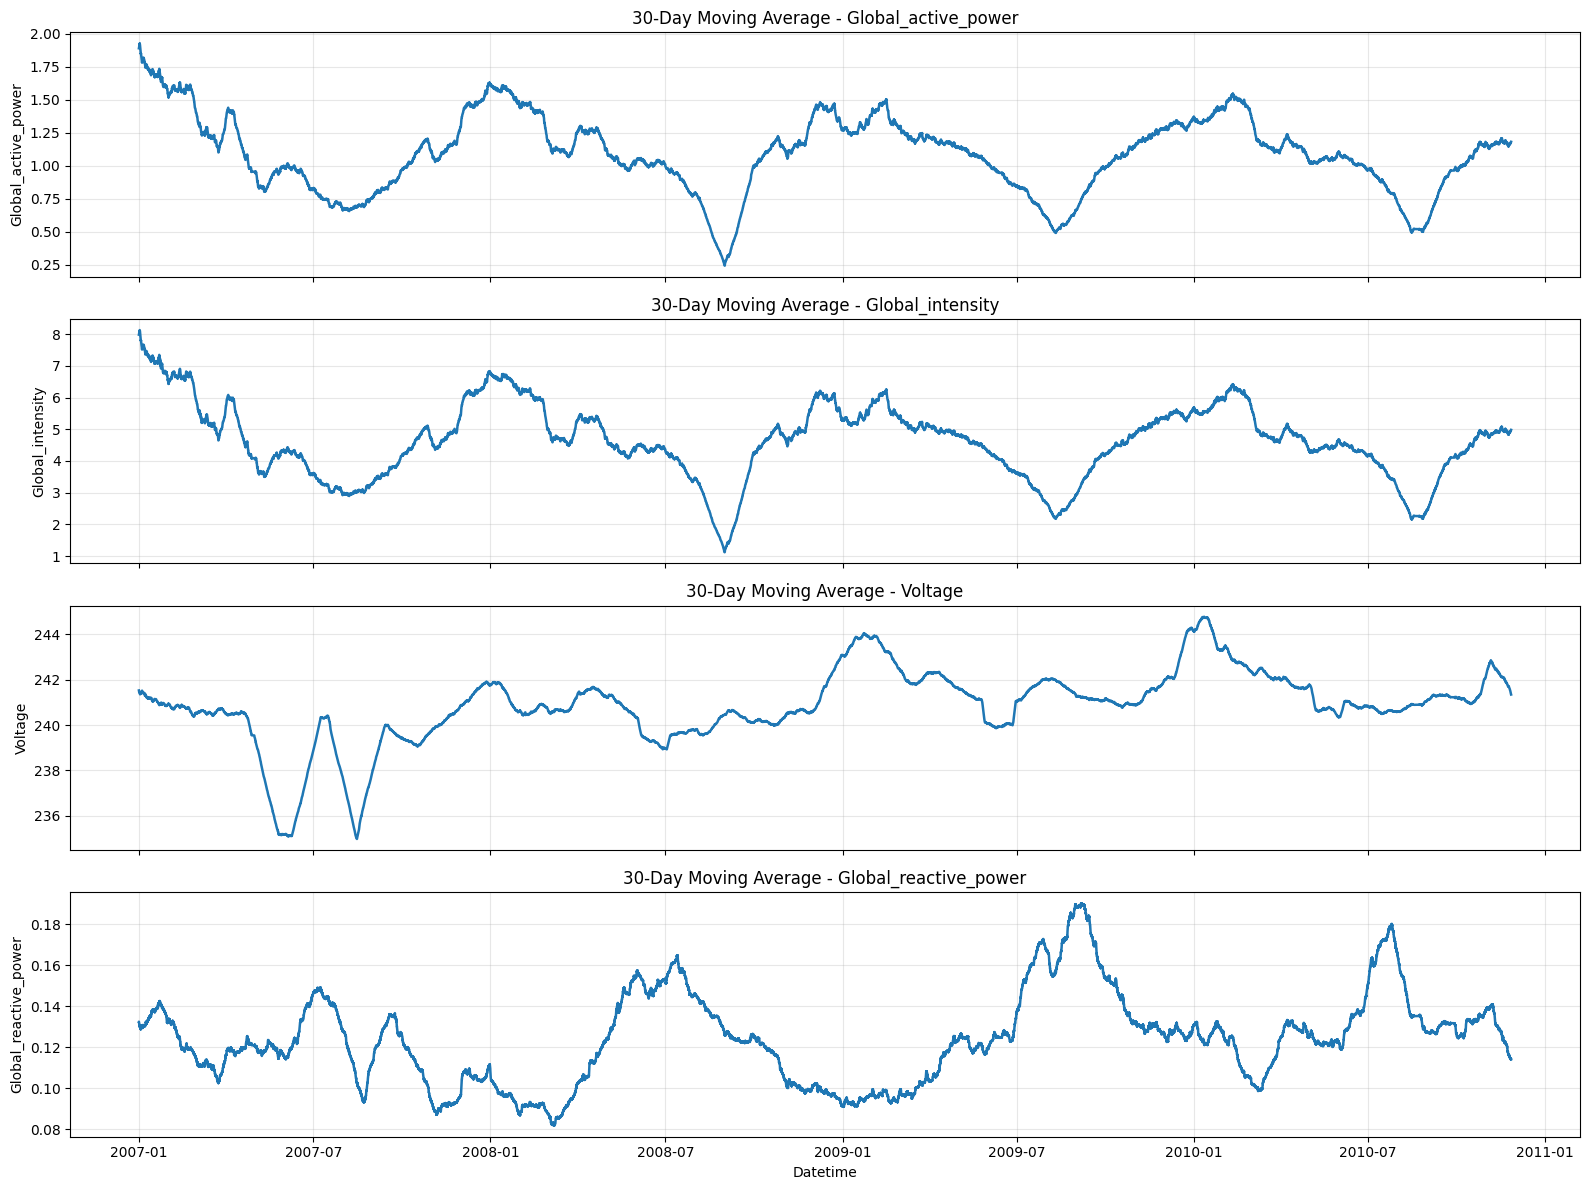

In [29]:
#build your line chart on the moving average here
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 12), sharex=True)

for ax, col in zip(axes, vars_to_plot):
    ax.plot(df_ma_30d["Datetime"], df_ma_30d[col], linewidth=1.8)
    ax.set_title(f"30-Day Moving Average - {col}")
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Datetime")
plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The 30‑day moving average gives a smooth, continuous trend line that can show changes within a month, while the monthly average collapses each month into one point, making it cleaner but more coarse. Overall, monthly averages are better for long‑range readability, and 30‑day moving averages are better for spotting gradual shifts and transitions without month-boundary jumps

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

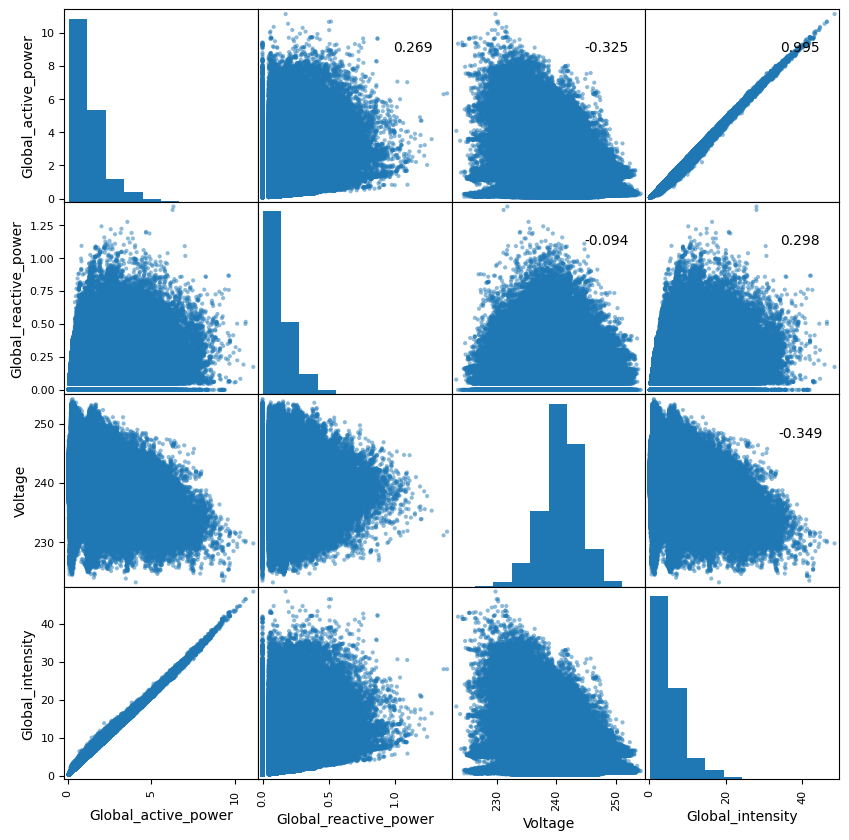

In [30]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: The scatter/correlation matrix shows a near-perfect positive relationship between Global_active_power and Global_intensity (ρ ≈ 0.995), meaning they are essentially measuring the same underlying “load” signal, while Voltage is moderately negatively related to load (ρ ≈ −0.325 with Global_active_power and ρ ≈ −0.349 with Global_intensity), suggesting voltage tends to dip slightly during higher demand periods; Global_reactive_power has only weak positive relationships with load (ρ ≈ 0.269 with Global_active_power and ρ ≈ 0.298 with Global_intensity) and is nearly uncorrelated with Voltage (ρ ≈ −0.094). In downstream tasks, this matters because the extremely high correlation between active power and intensity creates feature redundancy/multicollinearity, so you’d typically drop one of them or use regularization/dimensionality reduction, while Voltage and reactive power may provide more independent signal for prediction, anomaly detection, or feature engineering.


AI-Assisted Tools Disclosure (Required): I used ChatGPT (OpenAI) to help edit and condense my written response for the question about patterns/correlations and downstream impacts (wording/clarity only). The correlation values and interpretations were based on the scatter/correlation matrix output shown in my notebook, and I reviewed and revised the final wording to ensure I understand and can justify it.